In [734]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt

### We start loading our diamond dataset 💎

In [697]:
diamonds = pd.read_csv("diamonds_train.csv")

In [698]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [699]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### We suspect that we have some high correlated variables, let´s confirm it!

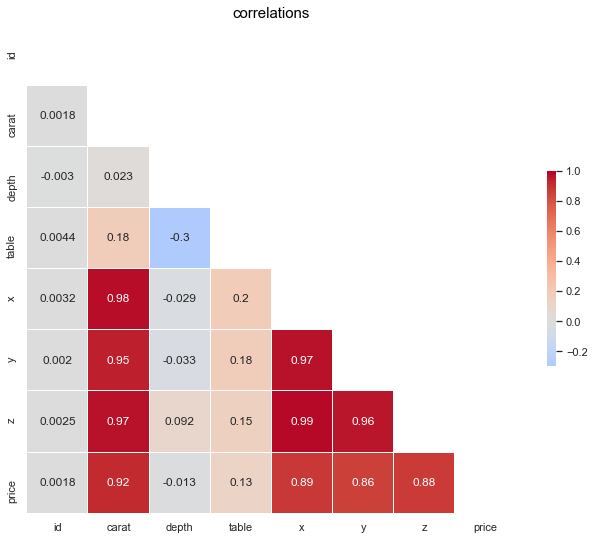

In [700]:

sns.set(style="white")
# Compute the correlation matrix
corr = diamonds.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = plt.cm.get_cmap('coolwarm')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .4},annot=True)
plt.title("correlations", fontsize=15, color='black', weight='medium')
sns.set()

### Here we can see the huge correlation between (x,y,z) and carat, so we will delete these variables

In [702]:
diamonds_dum = pd.get_dummies(diamonds)

In [703]:
diamonds_dum.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.78,61.5,58.0,5.93,5.98,3.66,3446,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.31,60.8,56.0,4.37,4.32,2.64,732,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.30,62.3,54.0,4.30,4.34,2.69,475,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.04,62.0,58.0,6.54,6.46,4.03,9552,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.65,61.4,55.0,5.58,5.62,3.44,1276,0,0,...,0,1,0,0,1,0,0,0,0,0


In [704]:
X = diamonds_dum.drop(columns={"price"})
y = diamonds_dum['price']

In [726]:
diamonds_dum_x_y_z = diamonds_dum.drop(columns=["x","y","z","id"])

In [727]:
diamonds_dum_x_y_z.head(1)

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.78,61.5,58.0,3446,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [728]:
X = diamonds_dum_x_y_z.drop(columns="price")
y = diamonds_dum['price']

In [729]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Ok, it is time to select and train some models! 


In [748]:
models = {
    "linear": LinearRegression(fit_intercept=True,normalize=True),
    "randomforest": RandomForestRegressor(n_estimators=80, max_depth=15, min_samples_leaf=2, random_state=140),
    "Ridge regression": linear_model.Ridge(alpha=.5),
}

# Train all the models in the models dict
for name,model  in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} RMSE, {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}")

Training linear...
linear RMSE, 1157.095735185186
Training randomforest...
randomforest RMSE, 541.1019909374554
Training Ridge regression...
Ridge regression RMSE, 1157.0878225254444


In [713]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

0.99098832370801
0.981335346427896


### We have a winner! randomforest  have had a nice performance so we will select it as our final model

### Now we will train the model again and predict the diamond price for our diamond test data set

In [551]:
rf_reg.fit(X, y) ##entreno con todo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=140, verbose=0, warm_start=False)

In [552]:
diamonds_test = pd.read_csv("diamonds_test.csv")

In [553]:
diamonds_dum_test = pd.get_dummies(diamonds_test)

In [554]:
diamonds_dum_test_x_y_z = diamonds_dum_test.drop(columns=["x","y","z","id"])


In [555]:
diamonds_dum_x_y_z.head(1)

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.78,61.5,58.0,3446,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [556]:
diamonds_dum_test_x_y_z.head(1)

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.1,62.2,58.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [557]:
X = diamonds_dum_test_x_y_z 

In [558]:
price = rf_reg.predict(X)

In [559]:
diamonds_dum_test["price"] = price

In [560]:
diamonds_dum_test = diamonds_dum_test[["id","price"]]

In [561]:
diamonds_dum_test.head(1)

,id,price
0,0,4521.160885


In [562]:
diamonds_dum_test.to_csv("submission.csv",index=False )

------------------------------

### We have finished, but we will train to obtain the features via RFECV and see if we have an improve

In [719]:
selector = RFECV(rf_reg, step=1, cv=5)

In [720]:
X = diamonds_dum_feature_forest
y = diamonds_dum['price']

In [721]:
selector.fit(X, y)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=15,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=2, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=80, n_jobs=None,
                                      oob_score=False, random_state=140,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [723]:
selector.n_features_

6

In [725]:
X.columns[selector.support_.tolist()]

Index(['carat', 'x', 'y', 'clarity_SI2', 'clarity_VVS1', 'clarity_VVS2'], dtype='object')

In [724]:
features_selected = ['carat', 'x', 'y', 'clarity_SI2', 'clarity_VVS1', 'clarity_VVS2']
features_selected

['carat', 'x', 'y', 'clarity_SI2', 'clarity_VVS1', 'clarity_VVS2']

In [417]:
diamonds_dum_feature_forest = diamonds_dum[features_selected]


In [722]:
diamonds_dum_feature_forest.head()

,carat,x,y,clarity_SI2,clarity_VVS1,clarity_VVS2
0,0.78,5.93,5.98,0,0,0
1,0.31,4.37,4.32,0,0,0
2,0.30,4.30,4.34,0,0,0
3,1.04,6.54,6.46,0,0,1
4,0.65,5.58,5.62,0,0,0


In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [422]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)

In [423]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, rf_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, rf_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('R2', r2_score(y_test, rf_reg.predict(X_test)))

METRIC SUMMARY
MSE 1386785.4003644711
RMSE 1177.618529220932
MSLE 0.041030471034904877
MAE 632.7656240386509
R2 0.9114928736936591


### It seems our first model was better!